In [855]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

from gorgo import infer, draw_from, flip
from gorgo.distributions.builtin_dists import Beta, Normal, Categorical, Bernoulli, Uniform

# Study 9 (feature domains)

## Feature embeddings

In [856]:
type_colors = {
    'physical': 'red',
    'appearance': 'orange',
    'abilities': 'brown',
    'personality': 'green',
    'diet/preferences': 'blue',
    'behaviors': 'purple',
    'habitat': 'black',
    'beliefs_culture': 'gray'
}

In [857]:
study6_training_features_by_type = {
    'physical': ['have freckles on their feet',],
    'appearance': ['have stripes in their hair',
                   'draw stars on their knees',],
    'abilities': ['can bounce a ball on their heads',
                  'can flip in the air',],
    'behaviors': ['climb tall fences',
                  'flap their arms when they are happy',
                  'hop over puddles',
                  'are scared of ladybugs',
                  'chase shadows',],
    'habitat': ['sleep in tall trees',],
    'diet/preferences': ["love to eat flowers",
                         "like to sing",
                         "really don't like walking in the mud",
                         "really don't like ice cream",],
    'beliefs_culture': ['babies are wrapped in orange blankets',]
}
    
study6_test_features_by_type = {
    'behaviors': ['live in caves',
                  'ride lions',
                  'farm potatoes',
                  'play banjos',
                  'look to their left when spoken to',
                  'clap three times before entering a room',
                  'smile when they are sad',
                  'chug maple syrup',
                  'yell at stray cats',
                  'go to the opera',
                  'sing beautiful songs',
                  'scream out windows',
                  'smell garbage for fun',
                  'wash their clothes in ponds',
                  'paint their hands yellow'],
    'beliefs_culture': ['dance around a fire on their 10th birthday',]
}

more_features_by_type = {
    'physical': ['have brown eyes', 'have green eyes', 'have blue eyes', 
                'have pale skin', 'have brown skin', 'have dark skin',
                'are tall', 'are short', 
                'have large feet', 'have small feet',
                'have wide feet', 'have narrow feet', 
                'have large bodies', 'have skinny bodies', 
                'have straight hair', 'have curly hair',
                'have little hair', 'have lots of hair', 
                'are ticklish'],
    'appearance': ['have long hair', 'have short hair', 
                   'wear bandanas', 'wear smocks', 'wear scarves', 'wear hats',
                   'wear glasses', 'wear long sleeves', 'wear lots of bracelets',
                   'wear earrings', 'have nose piercings',
                   'draw circles on their face', 'have tattoos'],
    'personality': ['are nice', 'are friendly', 'are mean', 'are angry',
                    'are shy', 'are quiet', 'are loud', 
                    'are funny', 'are silly', 'are serious',
                    'are forgetful', 'are thoughtful', 
                    'are curious', 
                    'are brave', 
                    'are smart'],
    'abilities': ['can flip in the air', 
                  'can run fast', 
                  'can lift heavy things',
                  'can jump very high', 
                  'can touch their toes', 
                  'can curl their tongue',
                  'can whistle', 
                  'can do cartwheels'],
    'diet/preferences': ['like to drink tea', 
                    'like to drink fizzy water', 
                    'like to drink maple syrup',
                    'like to eat broccoli',
                    'like to eat herbs', 
                    'like to eat sweets', 
                    'like to eat bread',
                    'drink milk', 
                    'eat cheese', 
                    'eat rice', 
                    'eat nuts', 
                    'eat meat',
                    'like to sing songs',
                    'like to ride bikes',
                    'like to swim'],
    'behaviors': ['greet each other with a hug',
                  'give good gifts',
                  'tell bad jokes',
                  'tell scary stories',
                  'collect pretty rocks',
                  'smile when they are sad',
                  'burp when they are tired',
                  'flap their arms when they are happy',
                  'chase shadows',
                  'hop over puddles',
                  'are scared of flowers',
                  'are scared of the dark',
                  'are scared of thunder',
                  'dance in the rain',
                  'take care of others',
                  'grow flowers',
                  'make bread',
                  'build furniture',
                  'deliver mail',
                  'make toys',
                  'make shoes',
                  'teach children'],
    'habitat': ['make houses out of straw',
                'make houses out of mud',
                'sleep in tall trees', 'live in caves', 
                'live alone', 'live with their families'],
    'beliefs_culture': ['think the moon is made of cheese', 'think rainbows are lucky',
                'worship the sun', 'believe in magic', 
                'wrap their babies in orange blankets', 'speak the Zarpish language',
                'know how to sing Zarpish songs', 'play the Zarpish game Pebbles']
}

# helper function to merge lists while avoiding duplicates
def merge_lists(existing, new):
    return list(dict.fromkeys(existing + new))

# merge all features into one list
features_by_type = {}

for source in [study6_training_features_by_type, study6_test_features_by_type, more_features_by_type]:
    for feature_type, features in source.items():
        if feature_type in features_by_type:
            features_by_type[feature_type] = merge_lists(features_by_type[feature_type], features)
        else:
            features_by_type[feature_type] = features.copy()

In [858]:
# features_by_type = {
#     'physical': ['freckles',
#                  'eye color',
#                  'skin color',
#                  'height',
#                  'foot size',
#                  'foot width',
#                  'body size',
#                  'hair type',
#                  'hair amount',
#                  'ticklishness'],
#  'appearance':  ['stripes in hair',
#                 'draw stars on knees',
#                 'hair length',
#                 'hair style',
#                 'bandanas',
#                 'smocks',
#                 'scarves',
#                 'hats',
#                 'glasses',
#                 'long sleeves',
#                 'bracelets',
#                 'earrings',
#                 'nose piercings',
#                 'draw circles on their face',
#                 'tattoos'],
#  'abilities':   ['ability to bounce a ball on their heads',
#                  'ability to flip in the air',
#                  'running speed',
#                  'ability to lift heavy things',
#                  'jumping height',
#                  'ability to touch their toes',
#                  'ability to curl their tongue',
#                  'ability to whistle',
#                  'ability to do cartwheels'],
#  'behaviors':   ['climbing tall fences',
#                  'flapping their arms when they are happy',
#                  'behavior around puddles',
#                  'attitude towards ladybugs',
#                  'chasing shadows',
#                  'living in caves',
#                  'riding lions',
#                  'farming potatoes',
#                  'playing banjos',
#                  'looking to their left when spoken to',
#                  'clapping three times before entering a room',
#                  'smiling when they are sad',
#                  'chugging maple syrup',
#                  'yelling at stray cats',
#                  'going to the opera',
#                  'singing ability',
#                  'screaming out windows',
#                  'smelling garbage for fun',
#                  'washing their clothes in ponds',
#                  'painting their hands yellow',
#                  'greeting each other with a hug',
#                  'gift-giving ability',
#                  'quality of jokes',
#                  'telling scary stories',
#                  'rock-collecting propensity',
#                  'burpiness when they are tired',
#                  'fear of flowers',
#                  'fear of the dark',
#                  'fear of thunder',
#                  'behavior in the rain',
#                  'taking care of others',
#                  'growing flowers',
#                  'making bread',
#                  'building furniture',
#                  'delivering mail',
#                  'making toys',
#                  'making shoes',
#                  'teaching children'],
#  'habitat':     ['sleeping in tall trees',
#                  'houses made of straw',
#                  'houses made of mud',
#                  'living in caves',
#                  'living alone',
#                  'living with their families'],
#  'diet/preferences': ['preference for eating flowers',
#                       'preference for singing',
#                       "dispreference for walking in the mud",
#                       "dispreference for ice cream",
#                       "preference for tea",
#                       'preference for fizzy water',
#                       'preference for drinking maple syrup',
#                       'preference for eating broccoli',
#                       'preference for eating herbs',
#                       'preference for eating sweets',
#                       'preference for eating bread',
#                       'habits for drinking milk',
#                       'habits for eating cheese',
#                       'habits for eating rice',
#                       'habits for eating nuts',
#                       'habits for eating meat',
#                       'preference for singing songs',
#                       'preference for riding bikes',
#                       'preference for swimming'],
#  'beliefs_culture':  ['habits of wrapping babies in orange blankets',
#                       'cultural belief to dance around a fire on their 10th birthday',
#                       'belief that the moon is made of cheese',
#                       'belief that rainbows are lucky',
#                       'sun-worship',
#                       'belief in magic',
#                       'ability to speak the Zarpish language',
#                       'knowledge of Zarpish songs',
#                       'knowledge of the Zarpish game Pebbles'],
#  'personality':      ['extraversion',
#                       'agreeableness',
#                       'conscientiousness',
#                       'neuroticism',
#                       'openness to experience',
#                       'funniness',
#                       'silliness',
#                       'forgetfulness',
#                       'thoughtfulness',
#                       'bravery']
# }

In [859]:
# load pre-trained sentence transformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2') # better quality but slower

# flatten the features dictionary into a list of features
features = []
for feature_list in features_by_type.values():
    features.extend(feature_list)

# construct sentences
sentence_subject = "Zarpies"
# sentence_subject = "People"
sentences = [sentence_subject + " " + feature for feature in features]

In [860]:
# calculate sentence embeddings
embeddings = model.encode(sentences)
print(embeddings.shape)

(132, 384)


In [861]:
# calculate similarity between each sentence
similarities = model.similarity(embeddings, embeddings)

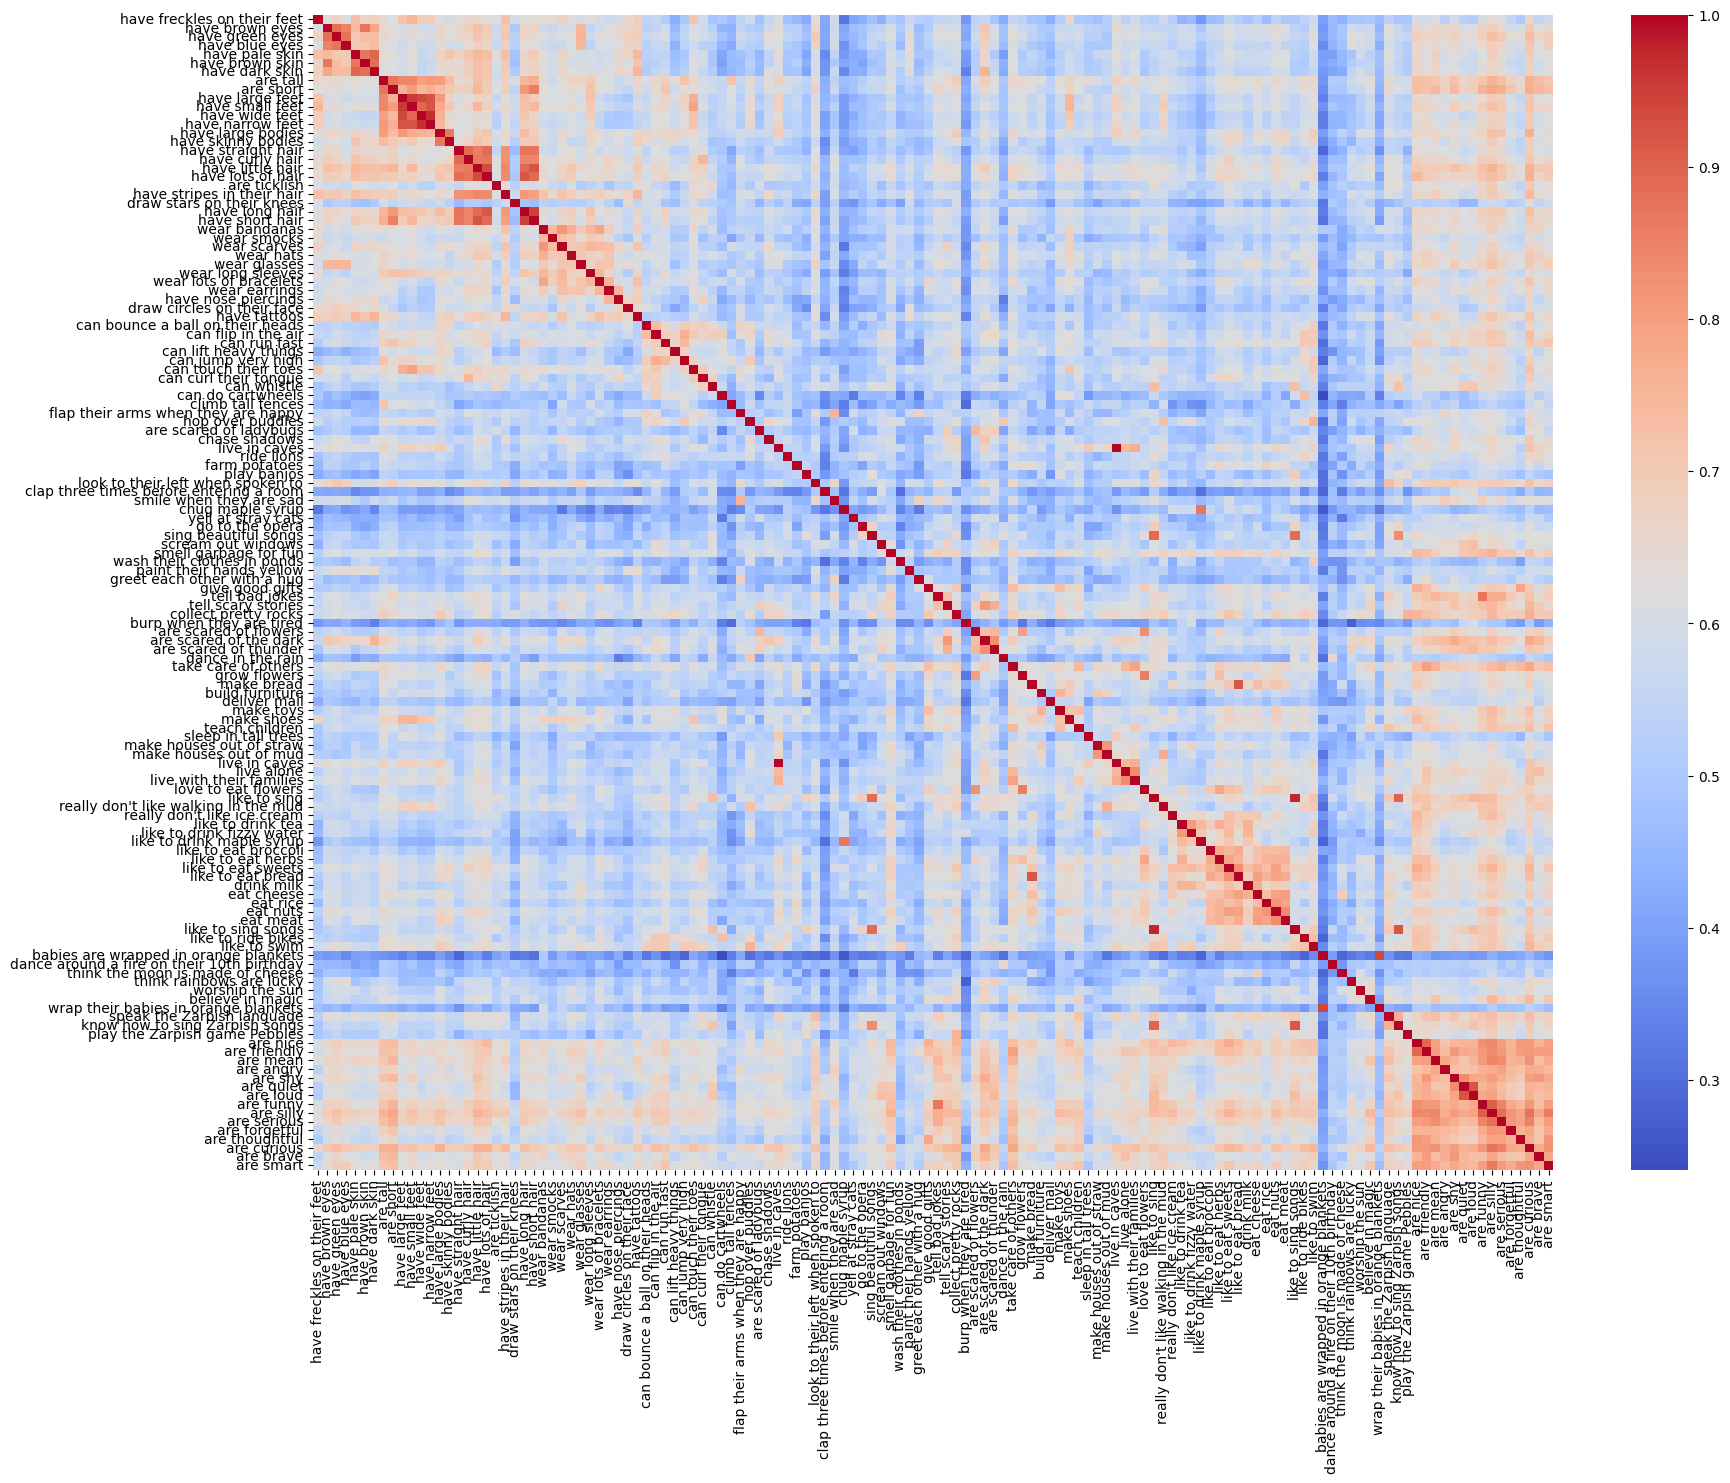

In [862]:
g = sns.heatmap(similarities, cmap='coolwarm', xticklabels=features, yticklabels=features)
g.figure.set_size_inches(20, 15)

# plt.savefig("figs/study 9/feature_similarities.png", bbox_inches = "tight")
# plt.show(g)

## 1D

### Feature space

In [863]:
# reduce the embeddings to 1D using PCA
pca = PCA(n_components=1)
positions = pca.fit_transform(embeddings)

In [864]:
# label embeddings with feature names and types
feature_info = {}
for feature_type, feature_list in features_by_type.items():
    for feat, pos in zip(features, positions):
        if feat in feature_list:
            feature_info[feat] = {
                'position': float(pos[0]),
                'type': feature_type
            }

# sort by embedding position
sorted_features = sorted(feature_info.items(), key=lambda x: x[1]['position'])

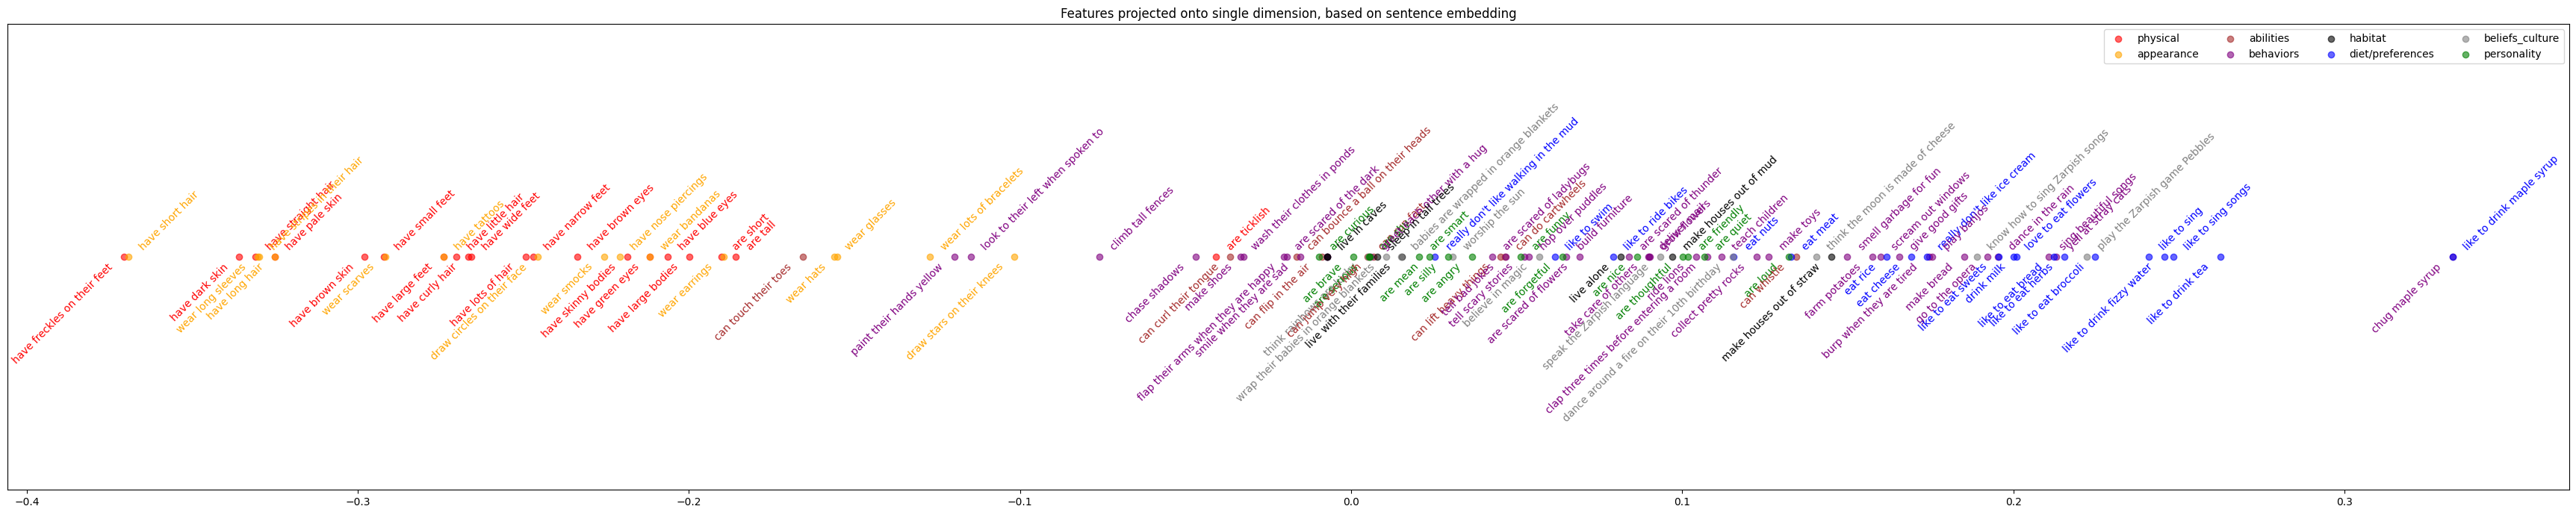

In [865]:
# plot setup
plt.figure(figsize=(35, 7))

# plot points by type
for type_name, features_in_type in features_by_type.items():
    # Get positions for this type
    type_positions = [positions[i] for i, feat in enumerate(features) if feat in features_in_type]
    if type_positions:
        plt.scatter(type_positions, 
                   np.zeros_like(type_positions),
                   c=type_colors[type_name],
                   label=type_name,
                   alpha=0.6)

plt.yticks([])

# to avoid overlap, alterate feature labels above and below points if too close
THRESHOLD = 0.04  # threshold for overlap
Y_POS = 0.002  # y dodging
X_POS = 0.005  # x dodging

# sort features by position to help determine overlap
last_pos = -float('inf')
above = False  # start with label below

for feat, info in sorted_features:
    pos = info['position']
    feat_type = info['type']
    color = type_colors[feat_type]
    
    # if points are too close, alternate label position
    if pos - last_pos < THRESHOLD:  # threshold for overlap
        above = not above
    else:
        above = False  # reset to below for well-separated points
    
    y_pos = Y_POS if above else -Y_POS
    x_pos = pos + X_POS if above else pos - X_POS
    ha = 'left' if above else 'right'
    va = 'bottom' if above else 'top'
    
    plt.annotate(feat, 
                xy=(pos, 0),  # point to annotate
                xytext=(x_pos, y_pos),  # text position
                ha=ha,
                va=va,
                color=color,
                rotation=45, 
                rotation_mode='anchor')
    
    last_pos = pos

plt.legend(loc='upper right', 
           ncol=4,
           fontsize=10)

plt.title("Features projected onto single dimension, based on sentence embedding")
plt.ylim(-0.1, 0.1)
plt.tight_layout()
plt.savefig("figs/study 9/features_1D.png", bbox_inches="tight") 
# plt.savefig("figs/study 9/features_1D_abstract.png", bbox_inches="tight") 
plt.show()

### Model

In [866]:
# given embeddings and binary kind-linked status of features in training, and embedding of test feature, fit the mean of the kind rule over feature embedding space
@infer(method="LikelihoodWeighting", samples=5000)
def infer_kind_score_function(training):
    
    # beta parameter for the feature's beta distribution
    # also called a "sparsity parameter"
    # this would be fit from the data
    beta_constant = 1
    
    # sample a mean for the Gaussian scoring function over feature space --> we are doing inference over this
    mu = Normal(0, 1).sample()
    sd = Uniform(0, 0.5).sample()
    
    # the kind has a Gaussian scoring function over feature space with that mean, with SD fixed at 1
    # has the shape of a Gaussian, but doesn't integrate to 1 necessarily
    # this is a soft rule that returns a score of how strongly kind-linked a feature is (continuous)
    kind_linked_score = Normal(mu, sd)
    
    # for each feature in training...
    for feature_embedding, is_kind_linked in training:
        # get the feature's score (a positive number), via the kind rule
        feature_kind_score = kind_linked_score.prob(feature_embedding)
        
        # the feature has some probability of being kind-linked
        # beta distribution = probability *over* various probabilities of the feature being kind-linked
        # alpha = score from the kind rule (=pseudo-count of heads), weighted by the beta constant --> higher score = more likely to be kind-linked
        # beta = your propensity to believe features are kind-linked
        # now, because beta_constant is on both sides, beta_constant controls how peaked the distribution is, feature_kind_score controls the mean
        # finally, sample a weight
        p_k = Beta(alpha = feature_kind_score * beta_constant + 1e-5, beta = beta_constant).sample()
        
        # feature's probability of being kind-linked (binary) = Bernoulli distribution
        Bernoulli(p_k).observe(is_kind_linked)
        
    return dict(mean=kind_linked_score.mean, sd=kind_linked_score.sd)

def predicted_scores(kind_linked_score_params, test_features):
    kind_linked_score = Normal(**kind_linked_score_params)
    scores = []
    for test_feature_embedding in test_features:
        feature_kind_score = kind_linked_score.prob(test_feature_embedding)
        scores.append(feature_kind_score)
    return tuple(scores)


### Model predictions

In [870]:
# provide features, and their kind-linked status

# training_data = (
#     ('are tall', True), 
#     ('wear lots of bracelets', True),
#     ('give good gifts', False),
#     ('like to eat herbs', False), 
# )

# Study 6 training data
training_data = (
    ('have freckles on their feet', False),
    ('have stripes in their hair', False),
    ('draw stars on their knees', True),
    ('can bounce a ball on their heads', True),
    ('can flip in the air', True),
    ('climb tall fences', True),
    ('flap their arms when they are happy', True),
    ('hop over puddles', True),
    ('are scared of ladybugs', True),
    ('chase shadows', True),
    ('sleep in tall trees', True),
    ("love to eat flowers", True),
    ("like to sing", True),
    ("really don't like walking in the mud", True),
    ("really don't like ice cream", True),
    ("babies are wrapped in orange blankets", True))

# # abstract features
# training_data = (
#     ('freckles', False),
#     ('stripes in hair', False),
#     ('draw stars on knees', True),
#     ('ability to bounce a ball on their heads', True),
#     ('ability to flip in the air', True),
#     ('climbing tall fences', True),
#     ('flapping their arms when they are happy', True),
#     ('behavior around puddles', True),
#     ('attitude towards ladybugs', True),
#     ('chasing shadows', True),
#     ('sleeping in tall trees', True),
#     ("preference for eating flowers", True),
#     ("preference for singing", True),
#     ("dispreference for walking in the mud", True),
#     ("dispreference for ice cream", True),
#     ("habits of wrapping babies in orange blankets", True))


# get the 1D embeddings of the training features
training = tuple(
    (feature_info[feature_name]['position'], is_kind_linked) 
    for feature_name, is_kind_linked in training_data
)

# store names separately for plotting
training_names = [name for name, _ in training_data]

kind_score_fn_post = infer_kind_score_function(
    training = training,
)

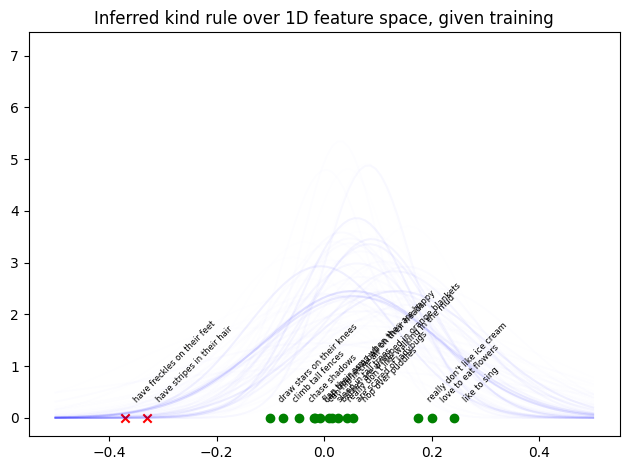

In [871]:
# define section of feature space to test
test_features = tuple(np.linspace(-0.5, 0.5, 100))
pred_scores = kind_score_fn_post.marginalize(
    lambda params: predicted_scores(params, test_features)
)

# make plot
fig, ax = plt.subplots()
plt.title("Inferred kind rule over 1D feature space, given training")

# plot inferred Gaussians
for scores, prob in pred_scores.items():
    ax.plot(test_features, scores, alpha=prob*1, color='b')

# annotate kind-linked vs non-kind-linked features
for (training_feature, is_kind_linked), name in zip(training, training_names):
    if is_kind_linked:
        ax.scatter(training_feature, 0, color='g', marker='o')
        ax.annotate(name, 
                   xy=(training_feature, 0),
                   xytext=(10, 10),
                   textcoords='offset points',
                   ha='left',
                   va='bottom',
                   fontsize=6,
                   rotation=45,
                   rotation_mode='anchor')
    else:
        ax.scatter(training_feature, 0, color='r', marker='x')
        ax.annotate(name, 
                   xy=(training_feature, 0),
                   xytext=(10, 10),
                   textcoords='offset points',
                   ha='left',
                   va='bottom',
                   fontsize=6,
                   rotation=45,
                   rotation_mode='anchor')
        
# save
plt.tight_layout()
plt.savefig("figs/study 9/model_1D.png", 
            bbox_inches="tight", dpi=300)
# plt.savefig("figs/study 9/model_1D_abstract.png", 
#             bbox_inches="tight", dpi=300)
plt.show()

## 2D

### Feature space

In [872]:
# reduce the embeddings to 2D using PCA
pca = PCA(n_components=2)
positions = pca.fit_transform(embeddings)

# make dictionary of features and their positions
feature_positions = {feat: tuple(pos) for feat, pos in zip(features, positions)}

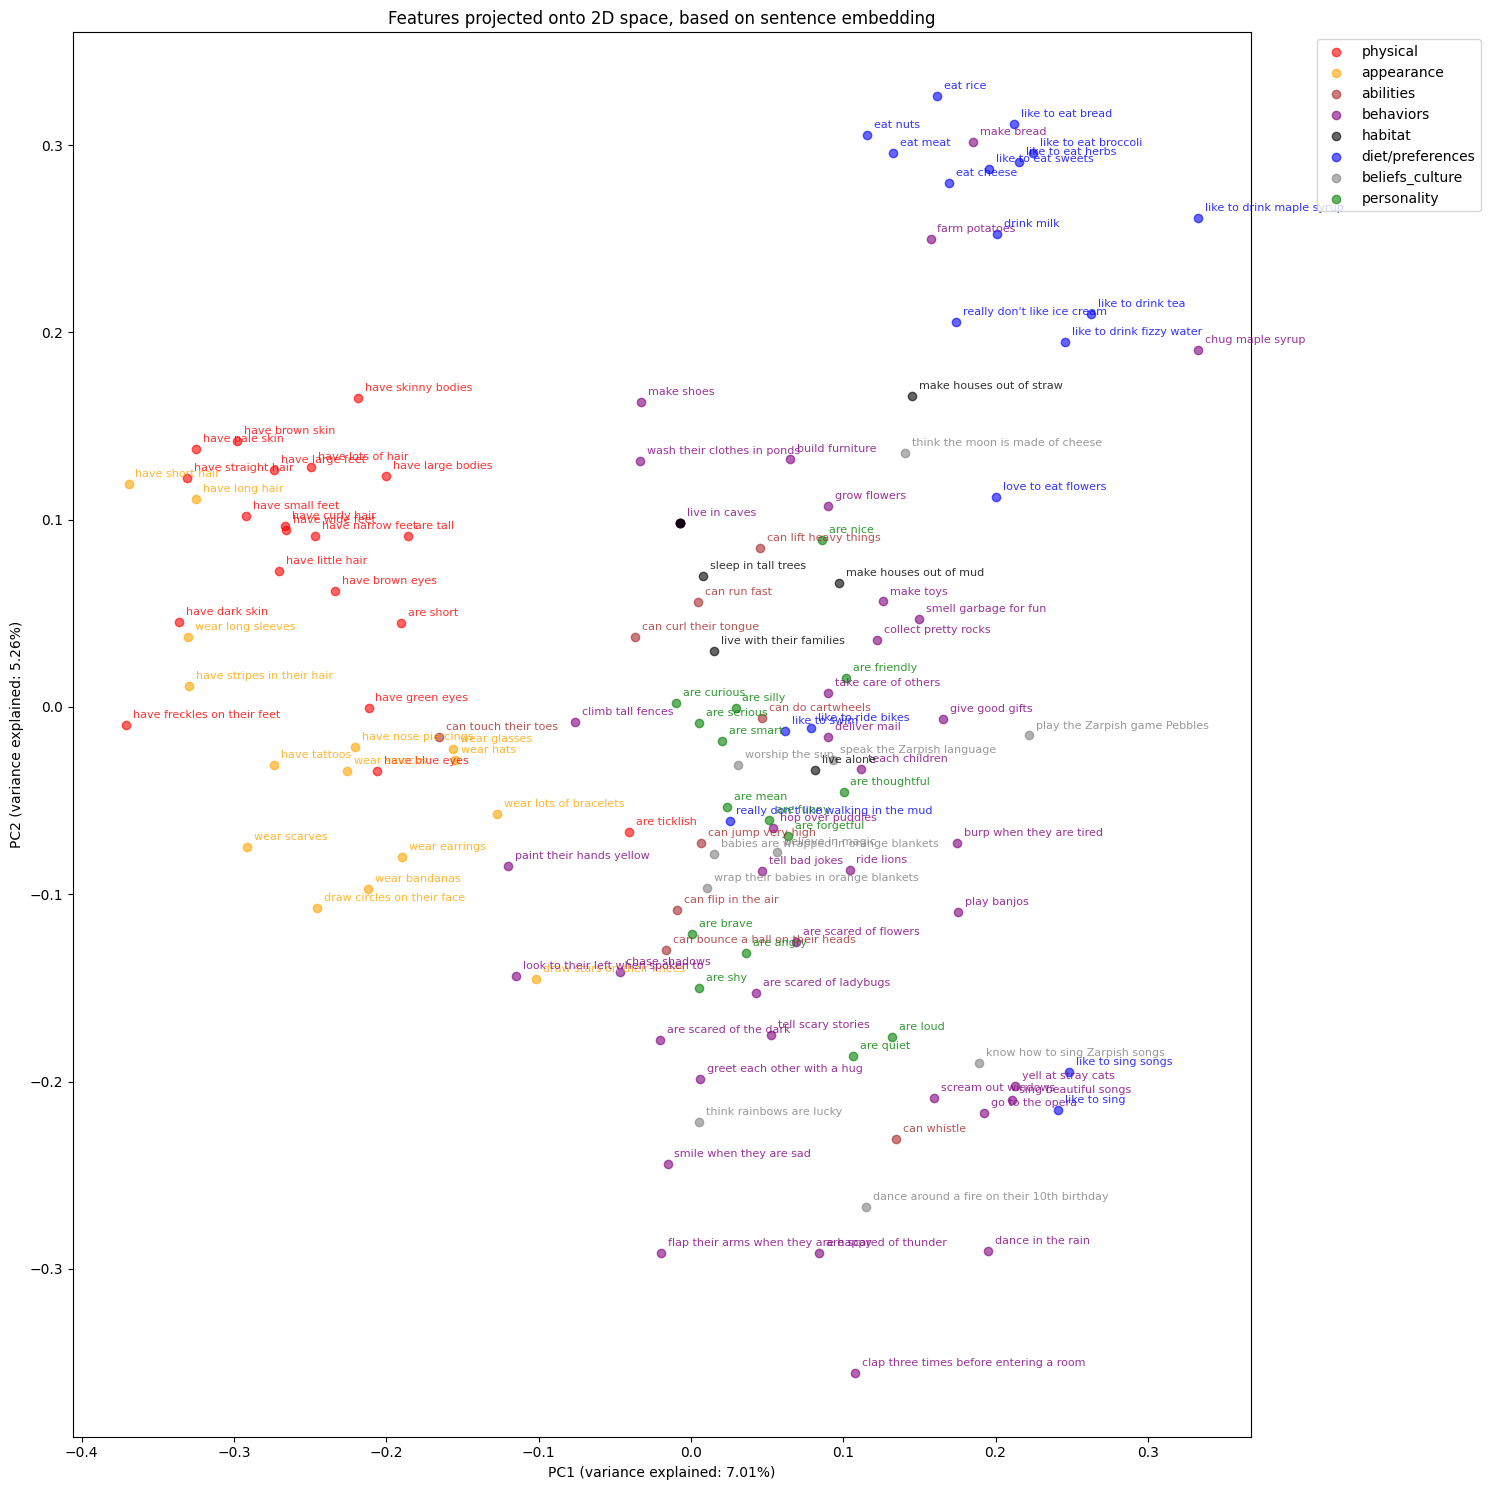

In [873]:

# plot
plt.figure(figsize=(15, 15))

# plot points of each type with diff colors
for type, features_in_type in features_by_type.items():
    # get indices of features in this type
    indices = [i for i, feat in enumerate(features) if feat in features_in_type]
    
    # feature points
    if indices:
        plt.scatter(positions[indices, 0],
                    positions[indices, 1],
                    c=type_colors[type],
                    label=type,
                    alpha=0.6)

# feature labels
for feat, pos in feature_positions.items():
    # find type of this feature for coloring
    type = next((typ for typ, feats in features_by_type.items() 
                    if feat in feats), 'other')
    
    # add feature label
    plt.annotate(feat,
                xy=(pos[0], pos[1]),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8,
                color=type_colors.get(type, 'gray'),
                alpha=0.8)

plt.title("Features projected onto 2D space, based on sentence embedding")
plt.xlabel(f"PC1 (variance explained: {pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 (variance explained: {pca.explained_variance_ratio_[1]:.2%})")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("figs/study 9/features_2D.png", 
            bbox_inches="tight", dpi=300)
# plt.savefig("figs/study 9/features_2D_abstract.png", 
#             bbox_inches="tight", dpi=300)
plt.show()

### Model

In [874]:
# given the embeddings and kind-linked status of training features... 
# fit the kind rule over feature embedding space
@infer(method="LikelihoodWeighting", samples=5000)
def infer_kind_score_function(training):
    
    # beta parameter for the feature's beta distribution
    # also called a "sparsity parameter"
    # this would be fit from the data
    beta_constant = 1
    
    # sample means and sd for the multivariate Gaussian scoring function over feature space --> we are doing inference over these
    mu1 = Normal(0, 1).sample()
    mu2 = Normal(0, 1).sample()
    sd1 = Uniform(0, 0.5).sample()
    sd2 = Uniform(0, 0.5).sample()
    
    # the kind has a multivariate Gaussian scoring function over feature space, with those means and SDs
    # has the shape of a multivariate Gaussian, but doesn't integrate to 1 necessarily
    # this is a soft rule that returns a score of how strongly kind-linked a feature is (continuous)
    kind_linked_score_1 = Normal(mu1, sd1)
    kind_linked_score_2 = Normal(mu2, sd2)
    
    # for each feature in training...
    for feature_embedding, is_kind_linked in training:
        assert len(feature_embedding) == 2, "Feature embedding must be a tuple of two values"
        
        # # Rotate and center the point
        # x = np.array(feature_embedding) - np.array([mu1, mu2])
        # rotated_x = rotation_matrix @ x
        
        # get the feature's score (a positive number), via the kind rule
        feature_kind_score = \
            kind_linked_score_1.prob(feature_embedding[0])*\
            kind_linked_score_2.prob(feature_embedding[1])
        
        # the feature has some probability of being kind-linked
        # beta distribution = probability *over* various probabilities of the feature being kind-linked
        # alpha = score from the kind rule (=pseudo-count of heads), weighted by the beta constant --> higher score = more likely to be kind-linked
        # beta = your propensity to believe features are kind-linked
        # now, because beta_constant is on both sides, beta_constant controls how peaked the distribution is, feature_kind_score controls the mean
        feature_kind_linked_prob = Beta(alpha = feature_kind_score * beta_constant + 1e-5, 
                                              beta = beta_constant)
        # finally, sample a weight
        p_k = feature_kind_linked_prob.sample()
        
        # feature's probability of being kind-linked (binary) = Bernoulli distribution
        Bernoulli(p_k).observe(is_kind_linked)
        
    return dict(
        mean=(mu1, mu2),
        sd=(sd1, sd2)
    )

def predicted_scores(kind_linked_score_params, test_features):
    kind_linked_score = Normal(**kind_linked_score_params)
    scores = []
    for test_feature_embedding in test_features:
        feature_kind_score = kind_linked_score.prob(test_feature_embedding)
        scores.append(feature_kind_score)
    return tuple(scores)

### Model predictions

In [875]:
# provide features, and their kind-linked status

# training_data = (
#     ('are tall', True), 
#     ('wear lots of bracelets', True),
#     ('give good gifts', False),
#     ('like to eat herbs', False), 
# )

# Study 6 training data
training_data = (
    ('have freckles on their feet', False),
    ('have stripes in their hair', False),
    ('draw stars on their knees', True),
    ('can bounce a ball on their heads', True),
    ('can flip in the air', True),
    ('climb tall fences', True),
    ('flap their arms when they are happy', True),
    ('hop over puddles', True),
    ('are scared of ladybugs', True),
    ('chase shadows', True),
    ('sleep in tall trees', True),
    ("love to eat flowers", True),
    ("like to sing", True),
    ("really don't like walking in the mud", True),
    ("really don't like ice cream", True),
    ("babies are wrapped in orange blankets", True))

# # abstract features
# training_data = (
#     ('freckles', False),
#     ('stripes in hair', False),
#     ('draw stars on knees', True),
#     ('ability to bounce a ball on their heads', True),
#     ('ability to flip in the air', True),
#     ('climbing tall fences', True),
#     ('flapping their arms when they are happy', True),
#     ('behavior around puddles', True),
#     ('attitude towards ladybugs', True),
#     ('chasing shadows', True),
#     ('sleeping in tall trees', True),
#     ("preference for eating flowers", True),
#     ("preference for singing", True),
#     ("dispreference for walking in the mud", True),
#     ("dispreference for ice cream", True),
#     ("habits of wrapping babies in orange blankets", True))

# get the 2D embeddings of the training features
training = tuple(
    ((feature_positions[feature_name]), is_kind_linked) 
    for feature_name, is_kind_linked in training_data
)

# store names separately for plotting
training_names = [name for name, _ in training_data]

# run inference
kind_score_fn_post = infer_kind_score_function(
    training = training,
)

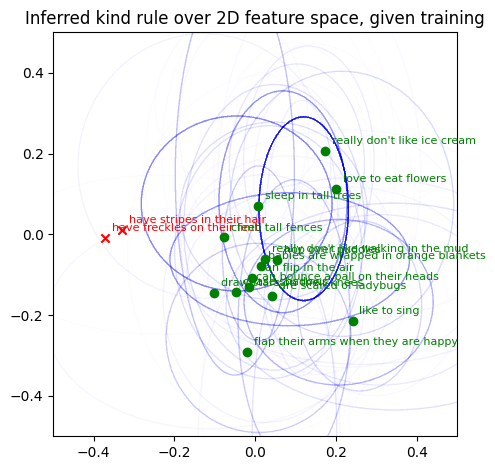

In [876]:
from matplotlib.patches import Ellipse

# plot the 2D Gaussian as an ellipse
def plot_2dgaussian(mus, sd1, sd2, ax, 
                    alpha=0.1):
    ellipse = Ellipse(
        xy=mus, 
        width=sd1*2, 
        height=sd2*2, 
        angle=0, 
        color='b',
        alpha=alpha,
        fill=False
    )
    ax.add_patch(ellipse)

fig, ax = plt.subplots()
ax.set_xlim(-.5, .5)
ax.set_ylim(-.5, .5)
ax.set_aspect('equal', adjustable='box')

plt.title("Inferred kind rule over 2D feature space, given training")

# sample a bunch of times from the posterior distribution of the kind score function, draw each as an ellipse
n_samples = 500
for _ in range(n_samples):
    mus_sds = kind_score_fn_post.sample()
    mus = mus_sds['mean']
    sd1 = mus_sds['sd'][0]
    sd2 = mus_sds['sd'][1]
    plot_2dgaussian(mus, sd1, sd2, ax, 
                    alpha=max(1/n_samples, 0.01))

# annotate kind-linked vs non-kind-linked features
for (training_feature, is_kind_linked), name in zip(training, training_names):
    if is_kind_linked:
        ax.scatter(training_feature[0], training_feature[1], 
                   color='g', marker='o')
        ax.annotate(name,
                   xy=(training_feature[0], training_feature[1]),
                   xytext=(5, 5),
                   textcoords='offset points',
                   color='g',
                   fontsize=8)
        
    else:
        ax.scatter(training_feature[0], training_feature[1], 
                   color='r', marker='x')
        ax.annotate(name,
                   xy=(training_feature[0], training_feature[1]), 
                   xytext=(5, 5),
                   textcoords='offset points',
                   color='r',
                   fontsize=8)
        
# save
plt.tight_layout()
plt.savefig("figs/study 9/model_2D.png", 
            bbox_inches="tight", dpi=300)
# plt.savefig("figs/study 9/model_2D_abstract.png", 
#             bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
# kind_rule_post.marginalize(lambda x: x['mean']).plot()

test_features = tuple(np.linspace(-5, 5, 100))
pred_scores = kind_score_fn_post.marginalize(
    lambda params: predicted_scores(params, test_features)
)